In [1]:
from lale.datasets.openml import fetch

In [2]:
(X_train, y_train), (X_test, y_test) = fetch("jungle_chess_2pcs_raw_endgame_complete", "classification")

In [3]:
from lale.helpers import cross_val_score

/usr/local/lib/python3.7/site-packages/pyparsing.py:3190: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


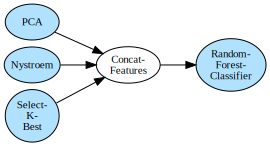

In [4]:
from lale.lib.sklearn import PCA, Nystroem, SelectKBest, RandomForestClassifier
from lale.lib.lale import ConcatFeatures

pipeline = (PCA() & Nystroem() & SelectKBest(k=3)) >> ConcatFeatures() >> RandomForestClassifier(n_estimators=200)
pipeline.visualize()

In [5]:
%%time 
cross_val_score(pipeline, X_train, y_train, cv=10)

CPU times: user 9min 58s, sys: 10.9 s, total: 10min 9s
Wall time: 10min 19s


[0.8141858141858141,
 0.8178488178488178,
 0.8098568098568099,
 0.8175158175158175,
 0.8168498168498168,
 0.8188478188478189,
 0.8148518148518149,
 0.8131868131868132,
 0.8084610259826782,
 0.8061292471685543]